In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib
from typhon.plots.maps import get_cfeatures_at_scale
import cartopy.crs as ccrs
%matplotlib inline

In [3]:
def plot_file(casename, experiment=0, date='20190621', forcing=1):
    if casename == 'allCFCs':
        physics_id = 1
    elif casename == 'allCFCs_LM':
        physics_id = 2
    else:
        raise runtime_error('unknown case')
    fig = plt.figure(figsize=[20, 15])

    subcases = ['rld', 'rlu']
    for axid, subcase in enumerate(subcases):
        ax = plt.subplot(len(subcases), 1, axid+1,
                         projection=ccrs.PlateCarree())
        features = get_cfeatures_at_scale(scale='50m')
        ax.add_feature(features.BORDERS)
        ax.add_feature(features.COASTLINE)
        filename = f'Efx_ARTS-2-3_rad-irf_{date}/{subcase}_Efx_ARTS-2-3_rad-irf_r1i1p{physics_id}f{forcing}_gn.nc'
        with Dataset(filename, 'r') as ds:
            data = ds[subcase][:][experiment, :, -1]
            cax = ax.scatter(ds['lon'][:], ds['lat'][:],
                             s=180, c=data, cmap='temperature')
            print(f'Exp: {experiment} Min: {np.min(data)} Max: {np.max(data)}')
        plt.title(f'{subcase} {casename} {filename}')
        plt.colorbar(cax, ax=ax)

In [36]:
def plot_file_compare(casename, experiment=0, date='20190621', date_old='20190603'):
    if casename == 'allCFCs':
        physics_id = 1
        forcing = 1
    elif casename == 'allCFCs_LM':
        physics_id = 2
        forcing = 1
    elif casename == 'option2':
        physics_id = 1
        forcing = 2
    elif casename == 'option3':
        physics_id = 1
        forcing = 3
    else:
        raise runtime_error('unknown case')
    fig = plt.figure(figsize=[20, 15])

    subcases = ['rld', 'rlu']
    for axid, subcase in enumerate(subcases):
        if subcase == 'rld':
            plev = -1
        else:
            plev = 0
        ax = plt.subplot(len(subcases), 1, axid+1,
                         projection=ccrs.PlateCarree())
        features = get_cfeatures_at_scale(scale='50m')
        ax.add_feature(features.BORDERS)
        ax.add_feature(features.COASTLINE)
        filename = f'Efx_ARTS-2-3_rad-irf_{date}/{subcase}_Efx_ARTS-2-3_rad-irf_r1i1p{physics_id}f{forcing}_gn.nc'
        filename_old = f'Efx_ARTS-2-3_rad-irf_{date_old}/{subcase}_Efx_ARTS-2-3_rad-irf_r1i1p{physics_id}f{forcing}_gn.nc'
        with Dataset(filename, 'r') as ds, Dataset(filename_old, 'r') as ds_old:
            data = ds[subcase][:][experiment, :, plev]-ds_old[subcase][:][experiment, :, plev]
            pressure = ds['plev'][:][experiment, plev]
            dmax = np.max((-np.min(data), np.max(data)))
            cax = ax.scatter(ds['lon'][:], ds['lat'][:],
                             s=180, c=data, vmin=-dmax, vmax=dmax, cmap='Spectral')
            print(f'Exp: {experiment} Min: {np.min(ds[subcase][:][experiment, :, plev])} Max: {np.max(ds[subcase][:][experiment, :, plev])}')
        plt.title(f'{subcase} {casename} expt: {experiment+1} {pressure/100:.0f} hPa\n{filename}\n-{filename_old}')
        plt.colorbar(cax, ax=ax)

In [39]:
#inpath_old = 'Efx_ARTS-2-3_rad-irf_20190319'
#inpath_old = 'Efx_ARTS-2-3_rad-irf_20190409'
inpath_old = 'Efx_ARTS-2-3_rad-irf_20190603'
inpath = 'Efx_ARTS-2-3_rad-irf_20190621'
for subcase in ['rld', 'rlu']:
    with Dataset(f'{inpath_old}/{subcase}_Efx_ARTS-2-3_rad-irf_r1i1p1f3_gn.nc', 'r') as ds:
        allcfcs_old = ds[subcase][:]
    with Dataset(f'{inpath}/{subcase}_Efx_ARTS-2-3_rad-irf_r1i1p1f3_gn.nc', 'r') as ds:
        allcfcs = ds[subcase][:]
    print(subcase, 'diff max:', np.max(allcfcs - allcfcs_old))
    print(subcase, 'diff min:', np.min(allcfcs - allcfcs_old))

rld diff max: 0.7484436
rld diff min: -3.0517578e-05
rlu diff max: 0.050125122
rlu diff min: -1.1674805


Exp: 0 Min: 89.08415985107422 Max: 423.3970947265625
Exp: 0 Min: 157.51547241210938 Max: 487.7523498535156
Exp: 0 Min: 89.08415985107422 Max: 423.3970947265625
Exp: 0 Min: 157.51547241210938 Max: 487.7523498535156


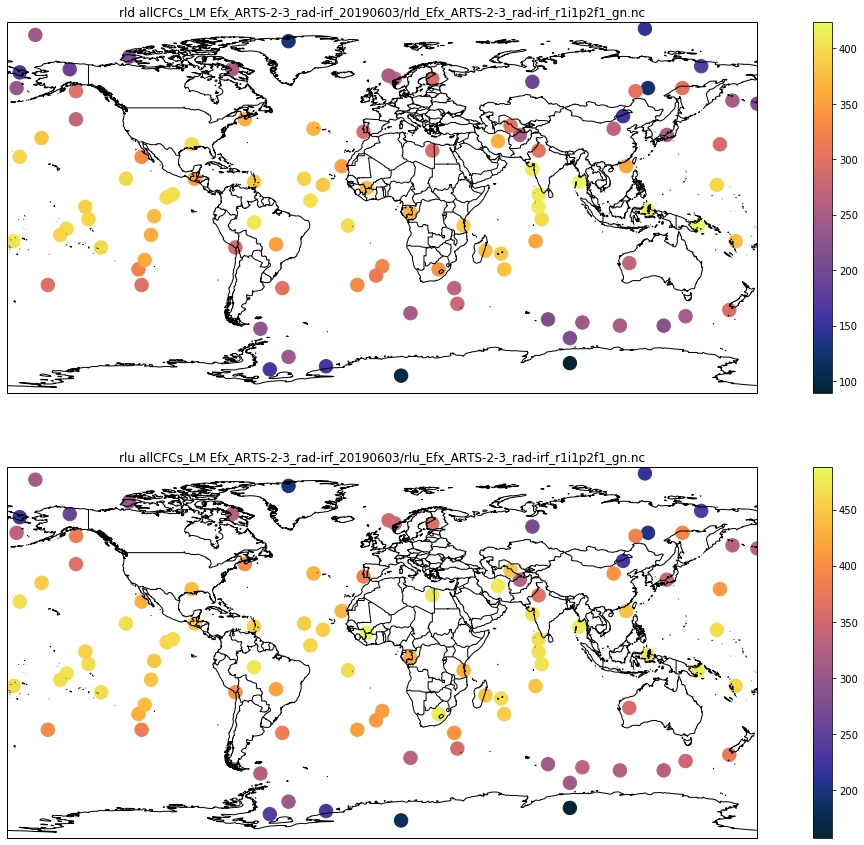

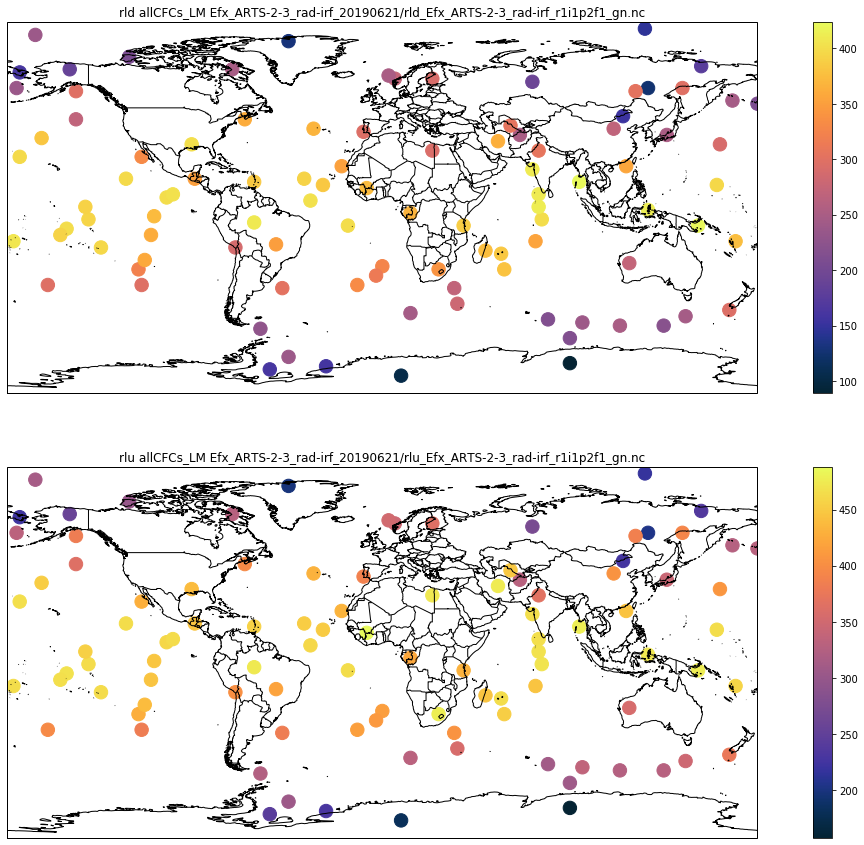

In [6]:
#plot_file('allCFCs', 0, '20190409', 2)
plot_file('allCFCs_LM', 0, '20190603', 1)
plot_file('allCFCs_LM', 0, '20190621', 1)

In [37]:
for case in ['allCFCs', 'allCFCs_LM', 'option2', 'option3']:
    for i in range(18):
        plot_file_compare(case, i)
        plt.savefig(f'comparison/{case}_{(i+1):02d}.pdf')
        plt.close()

Exp: 0 Min: 89.53852844238281 Max: 423.4342041015625
Exp: 0 Min: 140.50477600097656 Max: 308.9887390136719
Exp: 1 Min: 87.795166015625 Max: 422.45025634765625
Exp: 1 Min: 141.14979553222656 Max: 312.8287658691406
Exp: 2 Min: 93.17146301269531 Max: 424.9038391113281
Exp: 2 Min: 139.18807983398438 Max: 303.1725769042969
Exp: 3 Min: 93.29072570800781 Max: 424.8759460449219
Exp: 3 Min: 139.0223846435547 Max: 302.8426818847656
Exp: 4 Min: 85.97763061523438 Max: 422.53765869140625
Exp: 4 Min: 141.8773956298828 Max: 314.5470886230469
Exp: 5 Min: 90.7922592163086 Max: 423.85693359375
Exp: 5 Min: 140.03956604003906 Max: 307.03680419921875
Exp: 6 Min: 92.19686126708984 Max: 424.4284362792969
Exp: 6 Min: 139.531005859375 Max: 304.7939147949219
Exp: 7 Min: 95.4261703491211 Max: 426.3353576660156
Exp: 7 Min: 138.4630126953125 Max: 299.114501953125
Exp: 8 Min: 88.36595916748047 Max: 423.0963134765625
Exp: 8 Min: 140.94879150390625 Max: 310.8030700683594
Exp: 9 Min: 89.30467987060547 Max: 423.3262023